# Undersøk korpus med metadata

Notebook for å undersøke korpus med metadata.

En viktig metode i undersøkelse av metadata og tekster er grafer og nettverk. 

* [Wikiped


In [1]:
import requests

# hent Python-modulen nbtext.py fra Github
nba = requests.get("https://raw.githubusercontent.com/Yoonsen/Modules/master/nbtext.py").text
with open('nbtext.py','w', encoding='UTF-8') as pyfile:
    pyfile.write(nba)

# hent nbpictures.py fra Github
nbb = requests.get("https://raw.githubusercontent.com/Yoonsen/Modules/master/nbpictures.py").text
with open('nbpictures.py','w', encoding='UTF-8') as pyfile:
    pyfile.write(nbb)

import nbtext as nb
import nbpictures as pct

from nbtext import Corpus

Kommandoen for å lage et korpus er *Corpus()* som bygger et korpus av tekster som sammenlignes med en referanse. I det her eksemplet bygges referansen samtidig, men i et ideelt tilfelle kan vi ønske å la referansen være ferdigbygd et sted.

In [2]:
objekt = Corpus(
    period=(1950, 2010),
    #title='%',
    #subject='krig',
    ddk='335%',
    reference=50,
    max_books=50)

## Undersøk forskjeller

Dataene viser forskjellem mellom målkorpus og referanse. Se på differansen med kommandoen *difference* som tar et sett parametre. De viktigste for analysen er *freq_exp* som vekter frekvensen til ordene i målkorpuset, og *doc_exp* som vekter dokumentfrekvensen i målkorpuset.

Her benyttes forskjell i dokumentfrekvens og ordfrekvens mellom målkorpus (eller subkorpus) og referansekorpus

Settes verdien for *top* lik null får du hele korpuset.


In [3]:
objekt.difference(top=10, aslist=False, freq_exp=1.1, doc_exp=1.5)

,diff
samfunn,0.033100
Marx,0.032491
samfunnet,0.032349
politiske,0.031573
kapitalistiske,0.030653
revolusjon,0.029952
sosialistiske,0.029522
kamp,0.029333
borgerlige,0.028809
politisk,0.027500


In [4]:
objekt.difference(top=150)

In [19]:
objekt.difference(top=150, freq_exp=1, doc_exp=1.1)

Legg til summary() for se litt hva korpuset inneholder

In [5]:
objekt.summary()

{'parameters': {'author': '%',
  'ddk': '335%',
  'limit': 50,
  'next': 60,
  'reference': 50,
  'subject': '%',
  'title': '%',
  'year': 1950},
 'reference urn': [2013091706149,
  2011041308056,
  2011050208042,
  2011120108072,
  2013031106000,
  2009032004032,
  2009062301044,
  2008111304004,
  2009070900078,
  2009021004067],
 'target_urn': [2013040307023,
  2007092401072,
  2008052804073,
  2007073001121,
  2010082403018,
  2007060501049,
  2016082408022,
  2007072300076,
  2014050706057,
  2013102906141]}

# Metadata for korpuset kan raskt sjekkes

Pass på at ikke korpuset er for stort (mange tusen).

In [7]:
nb.metadata(objekt.target_urn)

[[2013040307023,
  'Rius',
  1981,
  'Marx for begynnere',
  'Gyldendal',
  'nob',
  'spa'],
 [2007092401072,
  'Nilsen, Fritz',
  1991,
  'Norsk sosialisme - hva nå?',
  'Cappelen',
  'nob',
  ''],
 [2008052804073,
  'Berntsen, Harald',
  1976,
  'historiske materialismen og dens historiske betingelser',
  'Gyldendal',
  'nob',
  ''],
 [2007073001121,
  'Enerstvedt, Regi Th.',
  1969,
  'Dialektikk og samfunnsvitenskap',
  'Ny dag',
  'nob',
  ''],
 [2010082403018,
  'Marx, Karl',
  1998,
  'Det kommunistiske manifest',
  'Røde fane',
  'nob',
  'ger'],
 [2007060501049,
  'Brandt, Willy',
  1976,
  'Brev og samtaler 1972-1975',
  'Tiden',
  'nob',
  'ger'],
 [2016082408022,
  'Bakunin, Michail',
  2002,
  'Det revolusjonære spørsmål : føderalisme, sosialisme og antiteologi ; Pariserkommunen : en dristig negasjon av staten',
  'Abrakadabra forl.',
  'nob',
  'fre'],
 [2007072300076, '', 1975, 'Sosialimperialismen', 'Oktober', 'nob', ''],
 [2014050706057,
  'Lévy, Bernard-Henri',
  1979

### Søk etter sett av ord i clustret

Finn verdien for ord i clusteret med objekt.check_words('o1 o2 o3 ... oN') med opsjonell spesifikasjon av eksponent. Bare list ordene opp med mellomrom, ord som ikke er i clusteret vil heller ikke vises. Alle andre vises med assosiasjonsverdien og sorteres var høy til lav. Tittel på kolonnen gir en påminnelse om ordet listen er kollokert fra.

In [8]:
objekt.search_words( 'sår krig . , gevær våpen generaler soldater blod fattigdom nød')

,diff
krig,0.389897
våpen,0.381583
nød,0.354876
fattigdom,0.314262
",",0.241312
.,0.212405
soldater,0.120081
blod,0.017202


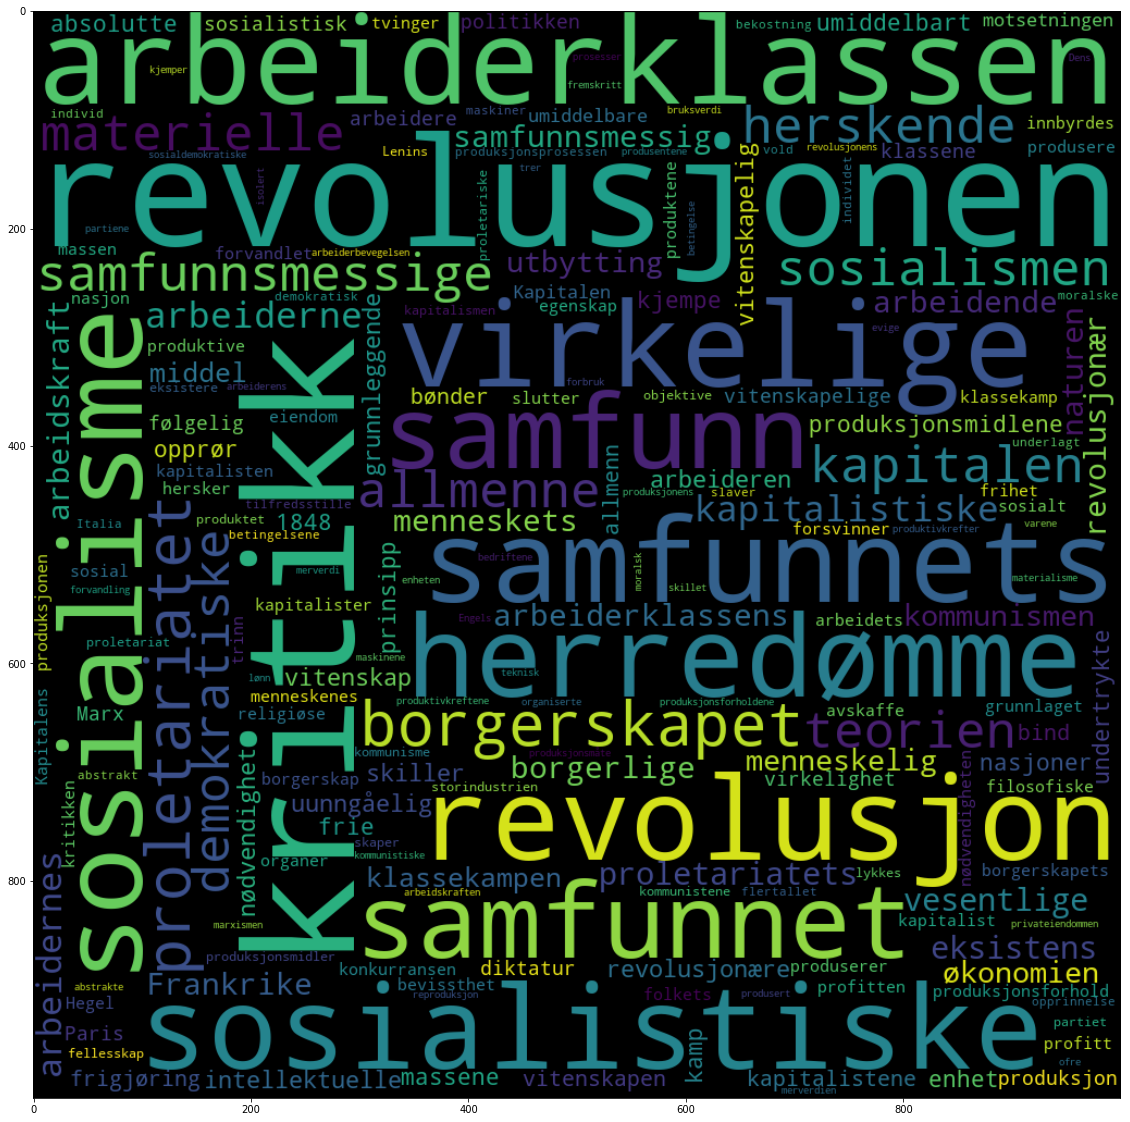

In [20]:
nb.cloud(objekt.difference(freq_exp=1, doc_exp=1.1, aslist=False))

In [23]:
G = nb.make_network(2007060501049,"""revolusjonen, kritikk, arbeiderklassen, virkelige, sosialistiske, revolusjon, samfunnets, herredømme, sosialisme, samfunnet, samfunn, borgerskapet, proletariatet, samfunnsmessige, teorien, herskende, kapitalen, sosialismen, materielle, demokratiske, allmenne, kapitalistiske, arbeiderne, arbeidernes, proletariatets, vesentlige, eksistens, samfunnsmessig, borgerlige, arbeiderklassens, arbeidskraft, naturen, arbeidende, revolusjonær, Frankrike, menneskets, kommunismen, menneskelig, utbytting, økonomien, klassekampen, middel, revolusjonære, nødvendighet, arbeideren, skiller, vitenskap, grunnleggende, vitenskapelig, intellektuelle, uunngåelig, produksjonsmidlene, frie, prinsipp, nasjoner, massene, absolutte, kjempe, opprør, umiddelbart, kamp, enhet, undertrykte, 1848, vitenskapen, bind, kapitalistene, allmenn, bønder, frigjøring, vitenskapelige, Paris, virkelighet, diktatur, følgelig, klassene, sosialistisk, produksjon, Marx, politikken, arbeidere, motsetningen, Kapitalen, umiddelbare, produksjonsforhold, menneskenes, produserer, Hegel, produsere, konkurransen, borgerskapets, bevissthet, grunnlaget, eiendom, frihet, kapitalister, kapitalist, slutter, religiøse, produktive, innbyrdes, tvinger, forsvinner, folkets, forvandlet, profitt, kapitalisten, organer, sosial, produksjonen, borgerskap, trinn, nasjon, massen, filosofiske, Kapitalens, arbeidets, sosialt, produktene, nødvendigheten, profitten, avskaffe, kritikken, egenskap, klassekamp, hersker, produksjonsmidler, proletariske, produktet, Lenins, proletariat, skaper, kapitalismen, fellesskap, partiet, objektive, kommunisme, lykkes, eksistere, storindustrien, kommunistene, produksjonsprosessen, slaver, bekostning, flertallet, Italia, vold, abstrakt, demokratisk, individ""".split(', '))

In [24]:
nb.central_betweenness_characters(G)

[('demokratiske', 0.21176671125644594),
 ('samfunn', 0.1961271006551108),
 ('kamp', 0.1608712077657222),
 ('partiet', 0.10043776319351767),
 ('demokratisk', 0.08667803063707484),
 ('revolusjonær', 0.0731846452615384),
 ('sosialisme', 0.07280438029485532),
 ('samfunnsmessig', 0.0700359725858359),
 ('revolusjonære', 0.0674184995601653),
 ('diktatur', 0.05641945501763369)]

True

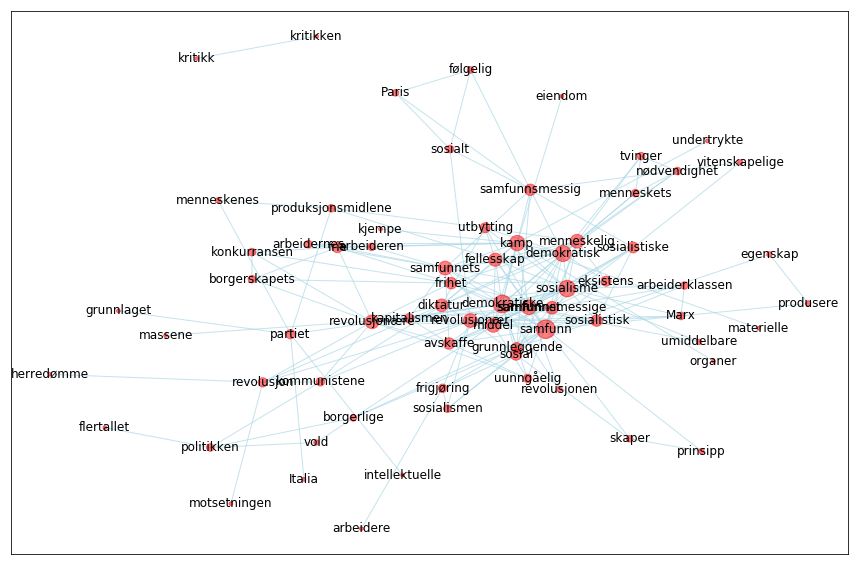

In [27]:
nb.draw_graph_centrality(G, k=0.5, fontsize=12)

In [30]:
def check_navn(navn, limit=2, remove='Ja Nei Unnskyld Ikke Ah Hmm'.split()):
    """Removes all items in navn with frequency below limit and words in all case as well as all words in list 'remove'"""
    r = {x:navn[x] for x in navn if navn[x] > limit and x.upper() != x}
    for w in remove:
        if w in r:
            del r[w]
    return r

In [29]:
R = nb.navn(2016082408022)
R

{'A': 13,
 'ANTITEOLOGI': 106,
 'Aastorp': 9,
 'Abrakadabra': 2,
 'Adam': 2,
 'Adolf': 2,
 'Afrika': 2,
 'Aftonbladet': 2,
 'Aiskhylos': 2,
 'Aleksander': 3,
 'Alexander': 3,
 'Alexandre': 3,
 'Amerika': 8,
 'Amsterdam': 2,
 'Anarchism': 6,
 'Anarchist': 3,
 'Anarchists': 2,
 'Anarchy': 2,
 'Anarkhija': 2,
 'Andrews': 2,
 'Antithéologisme': 2,
 'Antonia': 3,
 'Archives': 5,
 'Aristoteles': 4,
 'Arnold': 3,
 'Arthur': 4,
 'Auguste': 9,
 'Avrich': 2,
 'BAKUNIN': 4,
 'BAKUNINS': 8,
 'Babeuf': 2,
 'Bakounine': 17,
 'Bakunin': 173,
 'Bakunins': 52,
 'Basel': 3,
 'Beethoven': 2,
 'Belgia': 8,
 'Bellegarrigue': 2,
 'Benjamin': 2,
 'Berlin': 8,
 'Bern': 8,
 'Bismarck': 2,
 'Blanc': 5,
 'Blanqui': 2,
 'Bonaparte': 2,
 'Books': 4,
 'Boston': 3,
 'Breslau': 2,
 'Brorskapet': 4,
 'Brussel': 4,
 'Buonarotti': 4,
 'Cabet': 3,
 'Cafiero': 4,
 'Carlo': 5,
 'Catéchisme': 3,
 'Cavaignac': 4,
 'Champ': 2,
 'Charles': 4,
 'Coeurderoy': 2,
 'Commune': 2,
 'Comte': 7,
 'Considérant': 2,
 'Copernicus': 2,
 '

In [31]:
RN = check_navn(R, limit=2)

In [32]:
RN

{'Aastorp': 9,
 'Aleksander': 3,
 'Alexander': 3,
 'Alexandre': 3,
 'Amerika': 8,
 'Anarchism': 6,
 'Anarchist': 3,
 'Antonia': 3,
 'Archives': 5,
 'Aristoteles': 4,
 'Arnold': 3,
 'Arthur': 4,
 'Auguste': 9,
 'Bakounine': 17,
 'Bakunin': 173,
 'Bakunins': 52,
 'Basel': 3,
 'Belgia': 8,
 'Berlin': 8,
 'Bern': 8,
 'Blanc': 5,
 'Books': 4,
 'Boston': 3,
 'Brorskapet': 4,
 'Brussel': 4,
 'Buonarotti': 4,
 'Cabet': 3,
 'Cafiero': 4,
 'Carlo': 5,
 'Catéchisme': 3,
 'Cavaignac': 4,
 'Charles': 4,
 'Comte': 7,
 'Dieu': 3,
 'Dresden': 5,
 'Démocratie': 3,
 'Eigentum': 3,
 'Einzige': 3,
 'Empire': 3,
 'Engels': 5,
 'England': 10,
 'Etat': 3,
 'Europa': 30,
 'Europas': 12,
 'Februarrevolusjonen': 4,
 'Federativs': 3,
 'Ferdinand': 3,
 'Feuerbach': 3,
 'Firenze': 5,
 'Fourier': 3,
 'Frankrike': 28,
 'Fransk': 11,
 'Freedom': 3,
 'Friedrich': 3,
 'Føderalisme': 11,
 'Garibaldi': 3,
 'General': 3,
 'Genéve': 24,
 'Giuseppe': 6,
 'Godwin': 5,
 'Godwins': 4,
 'Gosudarstvennost': 3,
 'Gud': 55,
 'Guds

In [33]:
GR = nb.make_network(2016082408022,RN)

True

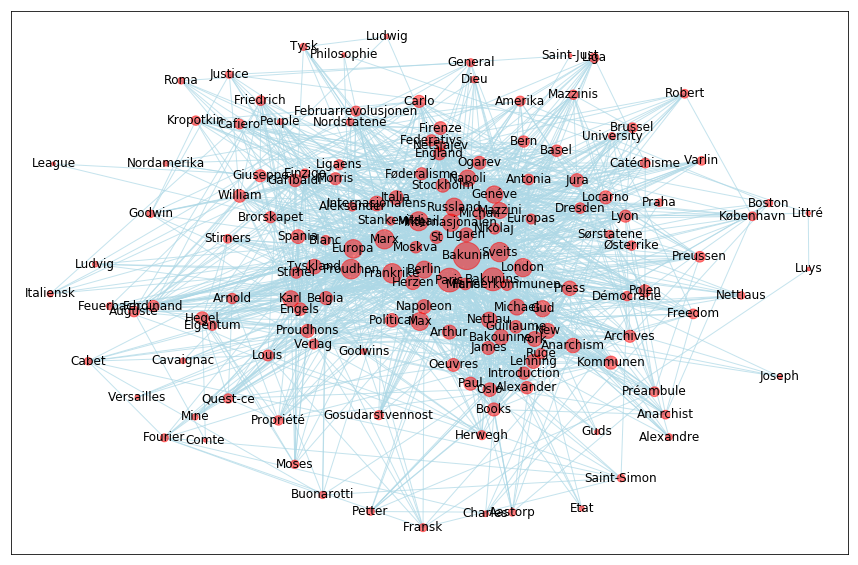

In [35]:
nb.draw_graph_centrality(GR, k=1.2, fontsize=12)

In [36]:
nb.central_betweenness_characters(GR)

[('Bakunin', 0.1735722981106444),
 ('Paris', 0.09406553229476207),
 ('Bakunins', 0.06525035259690651),
 ('Frankrike', 0.061086509115754625),
 ('Proudhon', 0.04878085813713963),
 ('Europa', 0.04677000322923596),
 ('Marx', 0.03675839268356233),
 ('Russland', 0.026363254296741523),
 ('Napoleon', 0.023560146009069683),
 ('Sveits', 0.021976807114825095)]

In [37]:
nb.central_characters(GR)

[('Bakunin', 0.75),
 ('Paris', 0.5641025641025641),
 ('Bakunins', 0.5256410256410257),
 ('Proudhon', 0.3846153846153846),
 ('Frankrike', 0.3782051282051282),
 ('Sveits', 0.3782051282051282),
 ('Marx', 0.3717948717948718),
 ('Mikhail', 0.36538461538461536),
 ('Europa', 0.34615384615384615),
 ('London', 0.3333333333333333)]